## Surface temperature - models + obs

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

from metric_plotFuncs import *

In [2]:
models = [
    # 'IPSL-CM5A-MR', # 1
     'GFDL-CM3',      # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]

observations = [
    ''
    ]
obs = observations[0]

variable_options = [
    'tas',
    'tas_tMean',
    'tas_sMean',
    ]
variable_option = variable_options[0]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]       

tas = xr.open_dataset(home + '/Documents/data/cmip5/' + 'ds' + '/' + model + '_tas_' + experiment + '.nc')[variable_option]
aWeights = np.cos(np.deg2rad(tas.lat))

## example of surface temperature

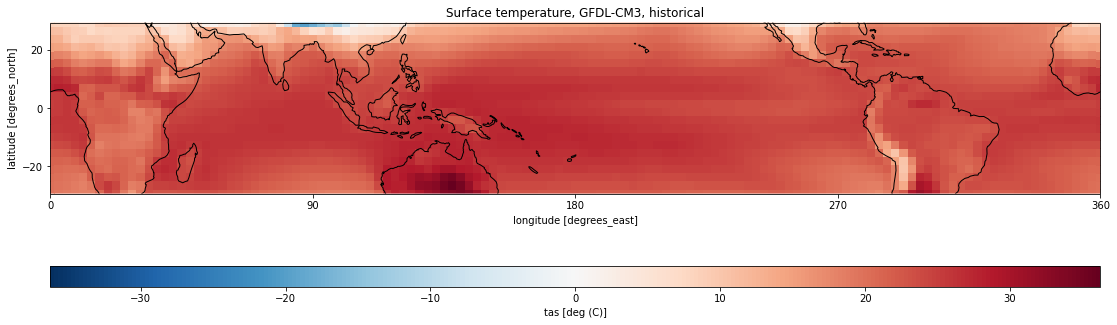

In [3]:
scene = tas.isel(time=0)
cmap="RdBu_r"
title = 'Surface temperature, ' + model + ', ' + experiment
vmin = -np.max(scene)
vmin = np.max(scene)

plot_scene(scene, cmap, title, vmin=None, vmax=None)

## one model / obs

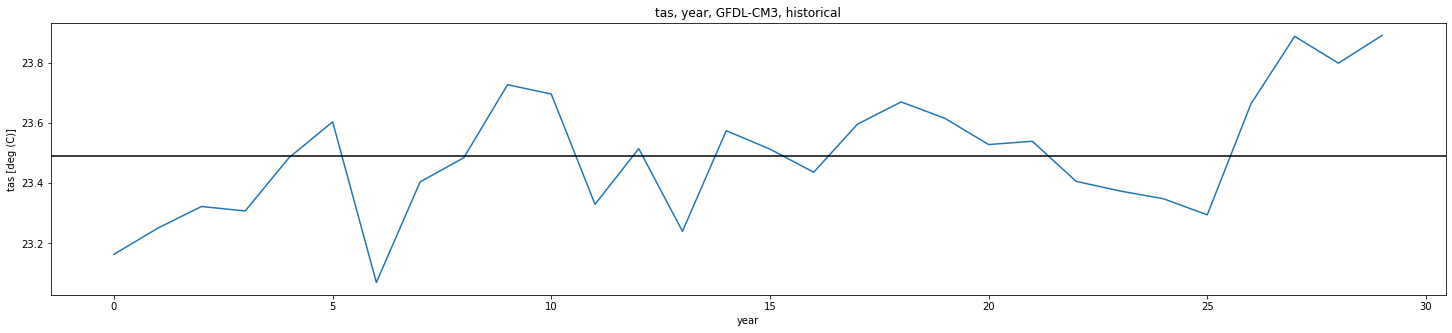

In [4]:
timeMean_options = [
    'year'
    # 'month'
    # 'season'
    # 'season_mean'
    # 'month_mean'
    ]
timeMean_option = timeMean_options[0]

variable_option = variable_options[0]

var = tas.weighted(aWeights).mean(dim = ('lat','lon'), keep_attrs =True)

if model:
    title = variable_option + ', '+ timeMean_option + ', ' + model + ', ' + experiment

    if timeMean_option == 'year':
        y = var.resample(time='Y').mean(dim='time', keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)

    if timeMean_option == 'month':
        y = var.resample(time='M').mean(dim='time', keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)

    if timeMean_option == 'day':
        y = var

        plot_timeseries(y, variable_option, timeMean_option, title)
    
    if timeMean_option == 'season':
        y = var.resample(time='QS-DEC').mean(dim="time")
        y = to_monthly(y)
        y = y.rename({'month':'season'})
        y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

        y.plot(x='year', hue='season', figsize=(25,5))
        plt.title(title)

    if timeMean_option == 'season_mean':
        y = var.resample(time='QS-DEC').mean(dim="time")
        y = to_monthly(y)
        y = y.rename({'month':'season'})
        y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

        plt.figure(figsize=(10,2.5))
        ax = plt.gca()
        (y.mean(dim='year') - y.mean(dim='year').mean(dim='season')).to_series().plot.bar(ax=ax)
        plt.axhline(y=0, color='k', linestyle='--')

        ax.set_xticklabels(y.season.values, rotation=30, ha='right')
        plt.title(title  + ', anomaly from annual mean')


    if timeMean_option == 'month_mean':
        y = to_monthly(var)
        y = y.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])
        y.mean(dim='year').plot(figsize = (10,2.5))
        plt.title(title)

if obs:
    title = variable_option + ', '+ timeMean_option + ', ' + obs + ', ' + experiment

    if timeMean_option == 'year':
        y = var_obs.resample(time='Y').mean(dim='time', keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)

    if timeMean_option == 'month':
        y = var_obs.resample(time='M').mean(dim='time', keep_attrs=True)

        plot_timeseries(y, variable_option, timeMean_option, title)

    if timeMean_option == 'day':
        y = var_obs

        plot_timeseries(y, variable_option, timeMean_option, title)
    
    if timeMean_option == 'season':
        y = var_obs.resample(time='QS-DEC').mean(dim="time")
        y = to_monthly(y)
        y = y.rename({'month':'season'})
        y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

        y.plot(x='year', hue='season', figsize=(25,5))
        plt.title(title)

    if timeMean_option == 'season_mean':
        y = var_obs.resample(time='QS-DEC').mean(dim="time")
        y = to_monthly(y)
        y = y.rename({'month':'season'})
        y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

        plt.figure(figsize=(10,2.5))
        ax = plt.gca()
        (y.mean(dim='year') - y.mean(dim='year').mean(dim='season')).to_series().plot.bar(ax=ax)
        plt.axhline(y=0, color='k',linestyle='--')

        plt.title(obs + ', anomaly from annual mean')
        ax.set_xticklabels(y.season.values, rotation=30, ha='right')


    if timeMean_option == 'month_mean':
        y = to_monthly(var_obs)
        y = y.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])
        y.mean(dim='year').plot(figsize = (10,2.5))
        plt.title(title)


## models together / obs

In [5]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',      # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    # ''
    ]
model = models[0]

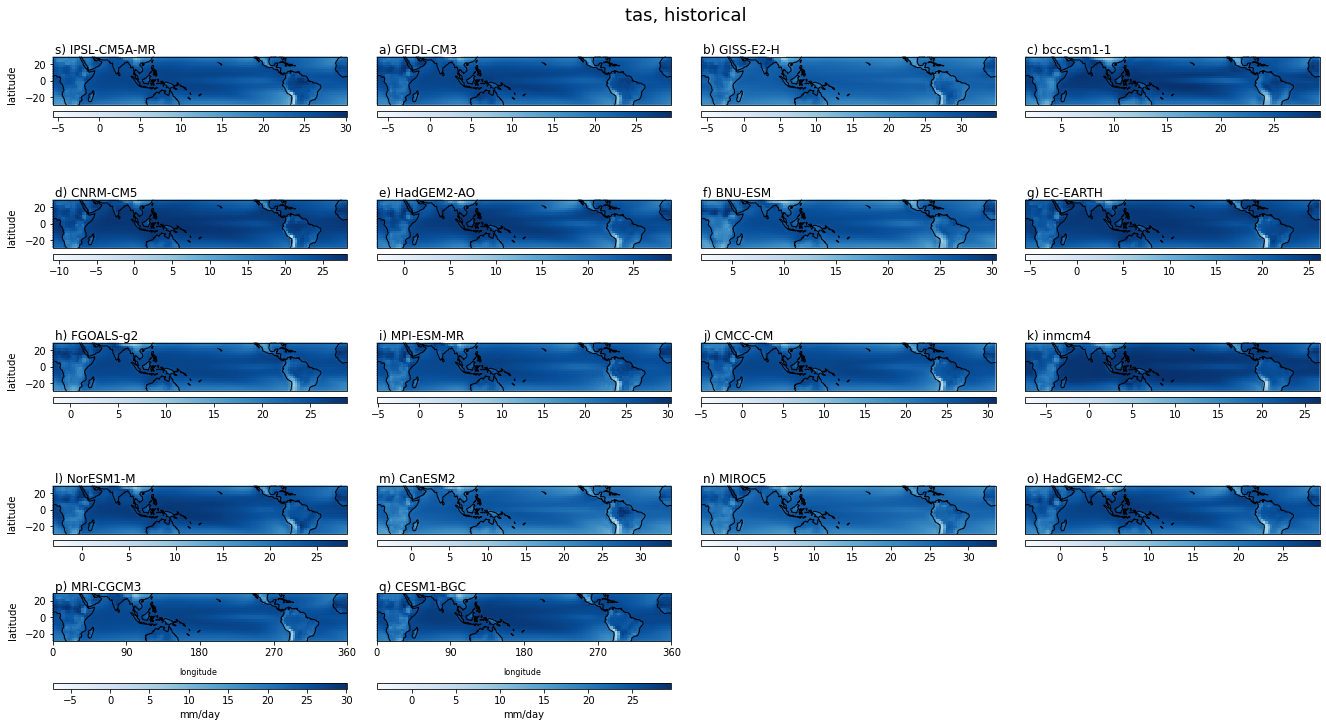

In [6]:
variable_file = 'tas'
scene_types = [
    'experiment',
    # 'diff',
    # 'diff_tas'
]
scene_type = scene_types[0]

title = variable_option + ', ' + experiment


plot_scenes_tog(home, models, obs, experiment, 
                    scene_type, variable_file, 
                    variable_option, title,
                    vmin=None, vmax=None)

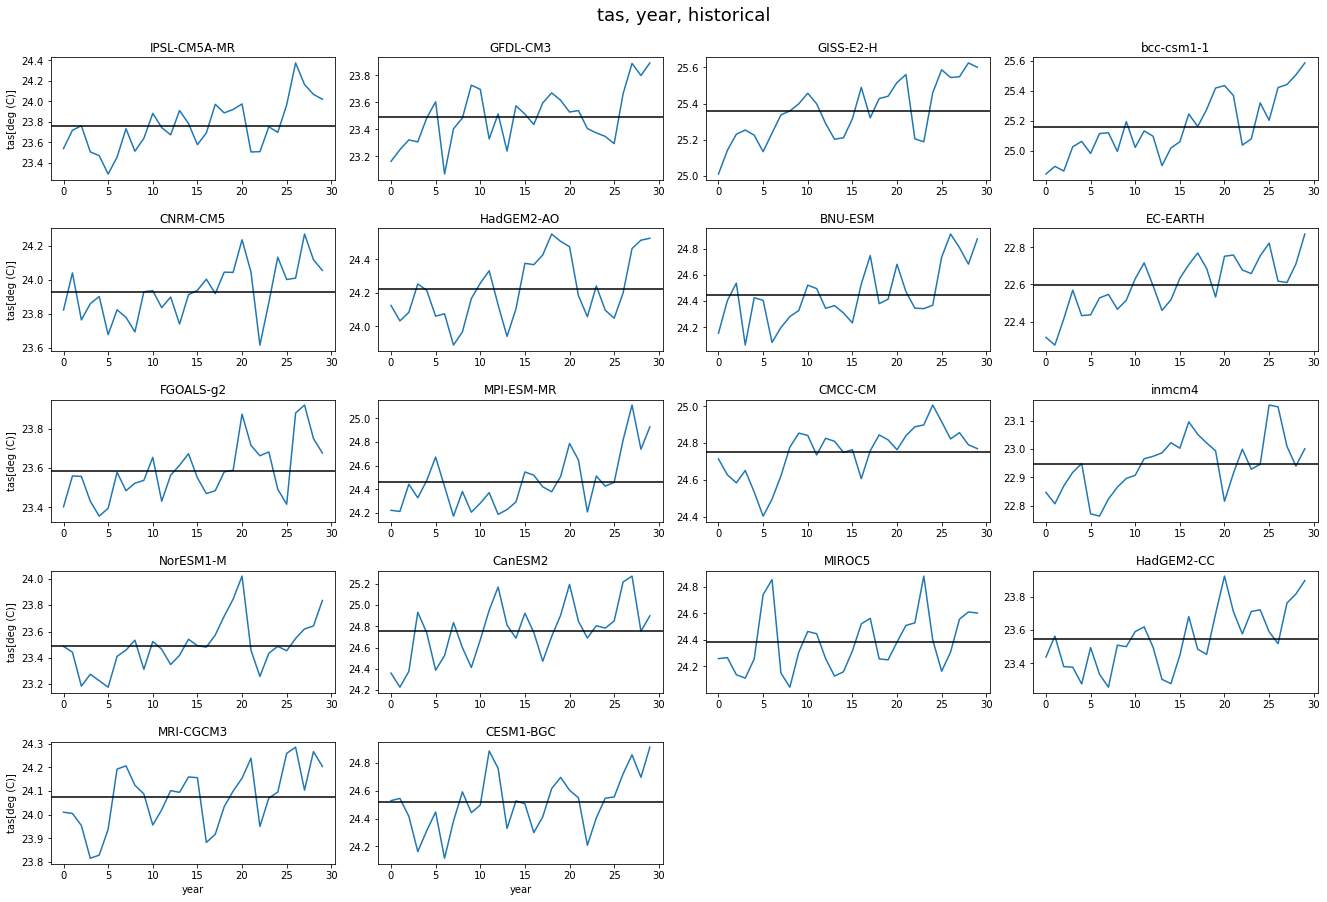

In [7]:
timeMean_options = [
    'year'
    # 'season'
    # 'season_mean'
    # 'month'
    # 'month_mean'
    ]
timeMean_option = timeMean_options[0]

variable_file = 'tas'
title = variable_option + ', '+ timeMean_option + ', ' + experiment
vmin = None
vmax = None

plot_timeseries_tog(models, obs, home, experiment, 
                    variable_file, variable_option, 
                    timeMean_option, title)

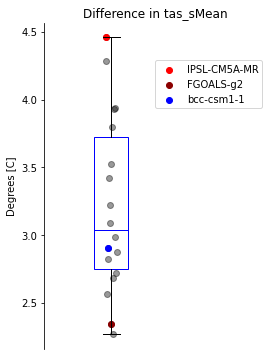

In [8]:
variable_option = variable_options[2]
variable_file = 'tas_sMean'
box_types = [
    # 'experiment',
    'diff',
]
box_type = box_types[0]

if box_type == 'experiment':
    title = variable_option + ', ' + experiment
    text_ylabel = 'Degrees (C)'

if box_type == 'diff':
    title = 'Difference in ' + variable_option
    text_ylabel = 'Degrees [C]'

boxplotColor(home, models, variable_file, variable_option, box_type, experiment, obs, title, text_ylabel)